In [19]:
import sys
sys.path.append('../')
import torch
from tools.utils import manual_seed
import PIL
import PIL.Image

import numpy as np
import matplotlib.pyplot as plt
from tools.img import rgb2yuv, yuv2rgb, rgb_to_yuv, yuv_to_rgb
from torchvision.transforms.transforms import ToTensor
from tools.dataset import get_dataloader, get_dataset_class_and_scale, get_dataset_normalization, get_de_normalization
from omegaconf import OmegaConf
from tools.img import tensor2ndarray, ndarray2tensor
from torchmetrics import StructuralSimilarityIndexMeasure
from tools.dataset import get_dataloader
# from tools.inject_backdoor import patch_trigger

manual_seed(42)
loss = StructuralSimilarityIndexMeasure

In [20]:
target_folder = '/home/chengyiqiu/code/INBA/results/cifar10/ftrojan/20241122101853'
path = f'{target_folder}/config.yaml'
config = OmegaConf.load(path)
manual_seed(config.seed)

device = f'cuda:{config.device}'
num_class, scale = get_dataset_class_and_scale(config.dataset_name)
if config.model == "resnet18":
    from models.preact_resnet import PreActResNet18
    net = PreActResNet18(num_classes=num_class).to(f'cuda:{config.device}')
elif config.model == "rnp":
    from models.resnet_cifar import resnet18
    net = resnet18(num_classes=num_class).to(f'cuda:{config.device}')
elif config.model == "repvgg":
    from repvgg_pytorch.repvgg import RepVGG
    net = RepVGG(num_blocks=[2, 4, 14, 1], num_classes=num_class, width_multiplier=[1.5, 1.5, 1.5, 2.75]).to(device=f'cuda:{config.device}')
else:
    raise NotImplementedError(config.model)
ld = torch.load(f'{target_folder}/results.pth', map_location=device)
net.load_state_dict(ld['model'])
net.to(device)

RepVGG Block, identity =  None
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identit

/tmp/ipykernel_569860/2909416994.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ld = torch.load(f'{target_folder}/results.pth', map_location=device)


RepVGG(
  (stage0): RepVGGBlock(
    (nonlinearity): ReLU()
    (se): Identity()
    (rbr_dense): Sequential(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (rbr_1x1): Sequential(
      (conv): Conv2d(3, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (stage1): ModuleList(
    (0): RepVGGBlock(
      (nonlinearity): ReLU()
      (se): Identity()
      (rbr_dense): Sequential(
        (conv): Conv2d(64, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (rbr_1x1): Sequential(
        (conv): Conv2d(64, 96, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tru

Load a example image and plot RGB channels.

Convert the RGB image to YUV channels, and plot them.

Use INBA to add pertubation to the imaginary part of U channel after FFT.

Files already downloaded and verified
Files already downloaded and verified
3
3
tensor([[0.6275, 0.7255, 0.8196],
        [0.8824, 0.9373, 0.9490],
        [0.9882, 0.9765, 0.9451]], device='cuda:0')
tensor([[0.6314, 0.7216, 0.8078],
        [0.8784, 0.9373, 0.9490],
        [0.9765, 0.9804, 0.9529]], device='cuda:0')


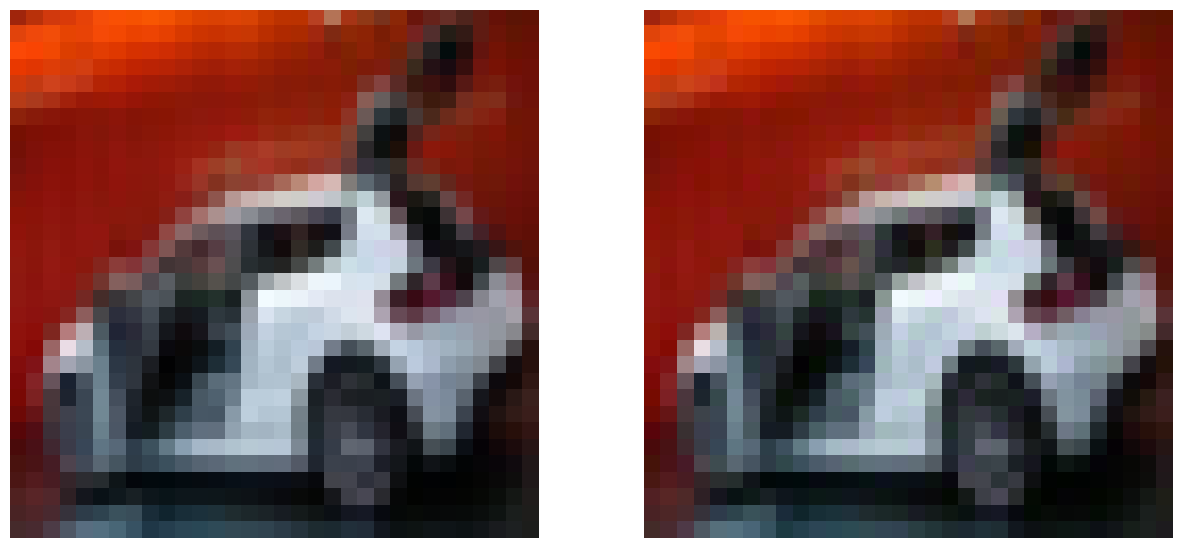

ssim: 0.9890910983085632


In [21]:
_, dl = get_dataloader(config.dataset_name, config.batch, config.pin_memory, config.num_workers)
de_norm = get_de_normalization(config.dataset_name)
do_norm = get_dataset_normalization(config.dataset_name)
x_c = None
for batch, label in dl:
    for i in range(batch.shape[0]):
        if label[i] == 1:
            x_c = batch[i]
            break
    if x_c != None:
        break

sys.path.append('./run')
sys.path.append(target_folder)
from inject_backdoor import patch_trigger
# x_p = de_norm(x_c).squeeze()
# x_p = patch_trigger(x_p, config)
# x_p.clip_(0, 1)
# x_p = do_norm(x_p)

x_c = de_norm(x_c).squeeze()
x_p = patch_trigger(x_c, config)
# x_p = do_norm(x_p)
# x_c = do_norm(x_c)

x_c = x_c.to(device)
x_p = x_p.to(device)

if config.model == 'repvgg':
    net.deploy = True
net.eval()
with torch.no_grad():
    out_c = net(x_c.unsqueeze(0))
    out_p = net(x_p.unsqueeze(0))
    _, y_c = torch.max(out_c, 1)
    _, y_p = torch.max(out_p, 1)


# x_c = de_norm(x_c).squeeze()
# x_p = de_norm(x_p).squeeze()


print(y_c.item())
print(y_p.item())

print(x_c[0, 0:3, 0:3])
print(x_p[0, 0:3, 0:3])

_, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(tensor2ndarray(x_c))
ax[0].axis('off')
ax[1].imshow(tensor2ndarray(x_p))
ax[1].axis('off')
plt.show()
ssim_metric = loss(data_range=1.0).to(device)(x_c.unsqueeze(0), x_p.unsqueeze(0))
print(f'ssim: {ssim_metric}')